In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



df = pd.read_csv('C:/Users/HOANG NAM/Desktop/bank/bank-full.csv',sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


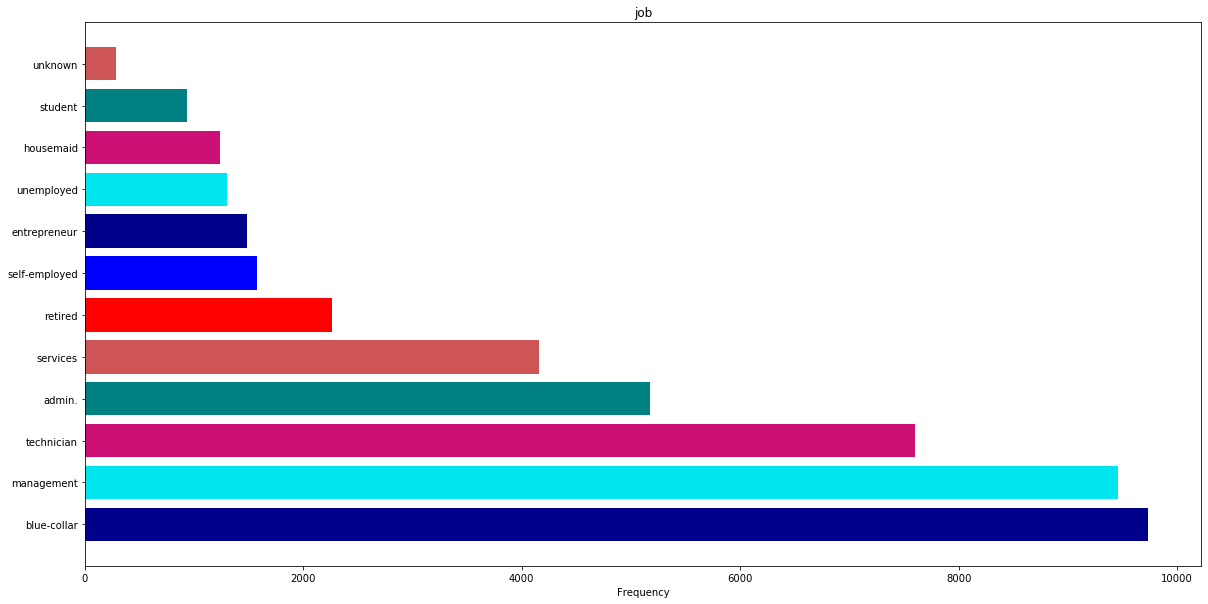

job: 
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


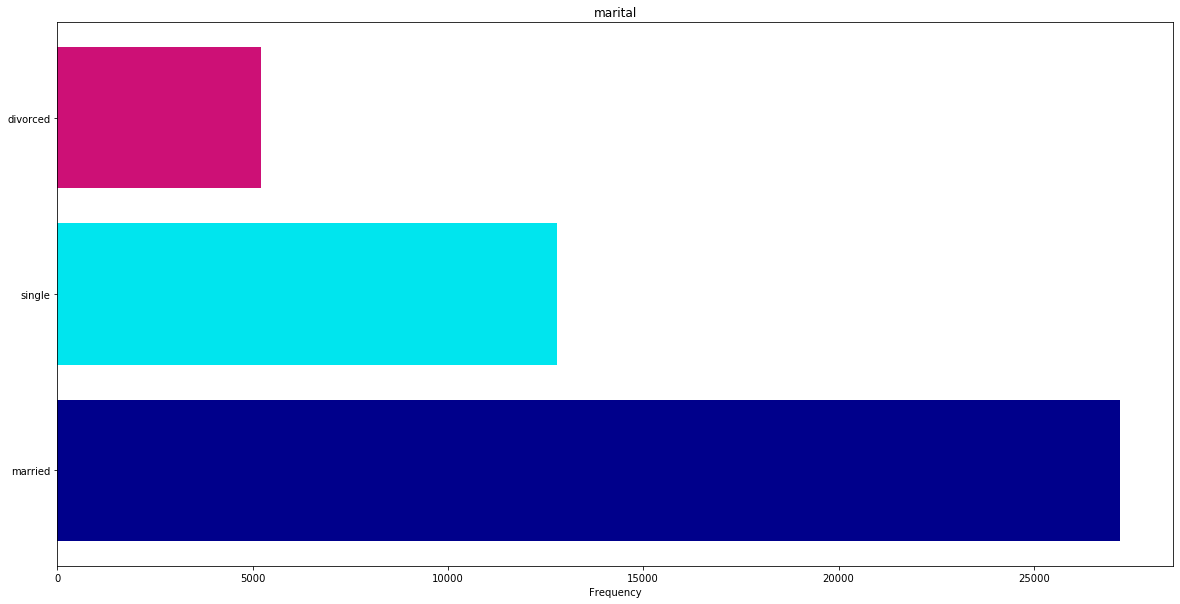

marital: 
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


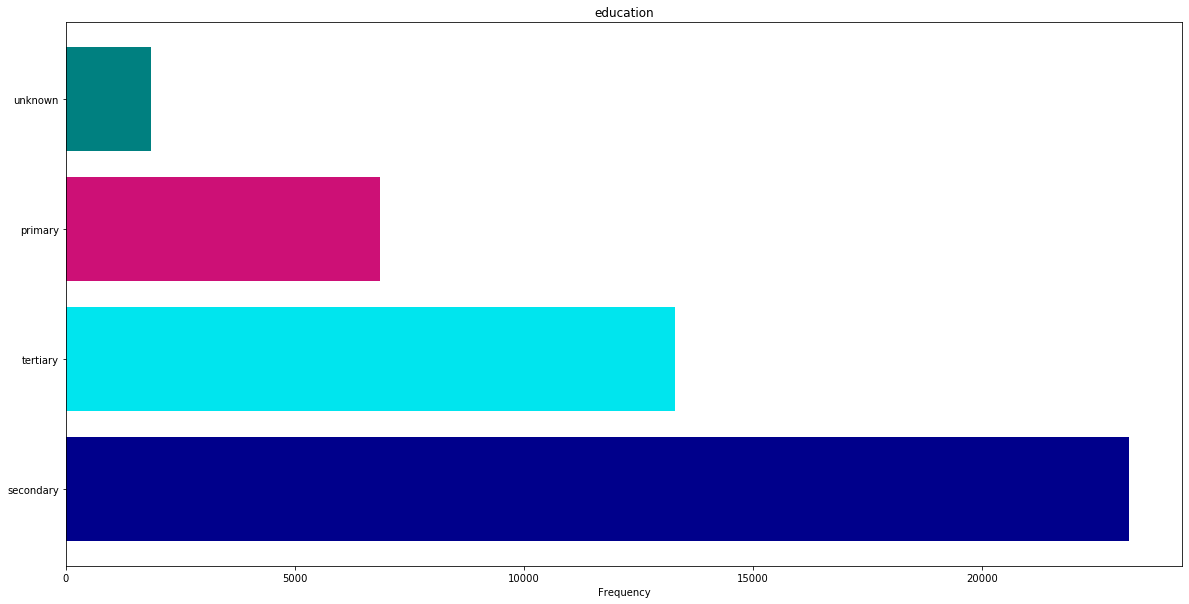

education: 
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


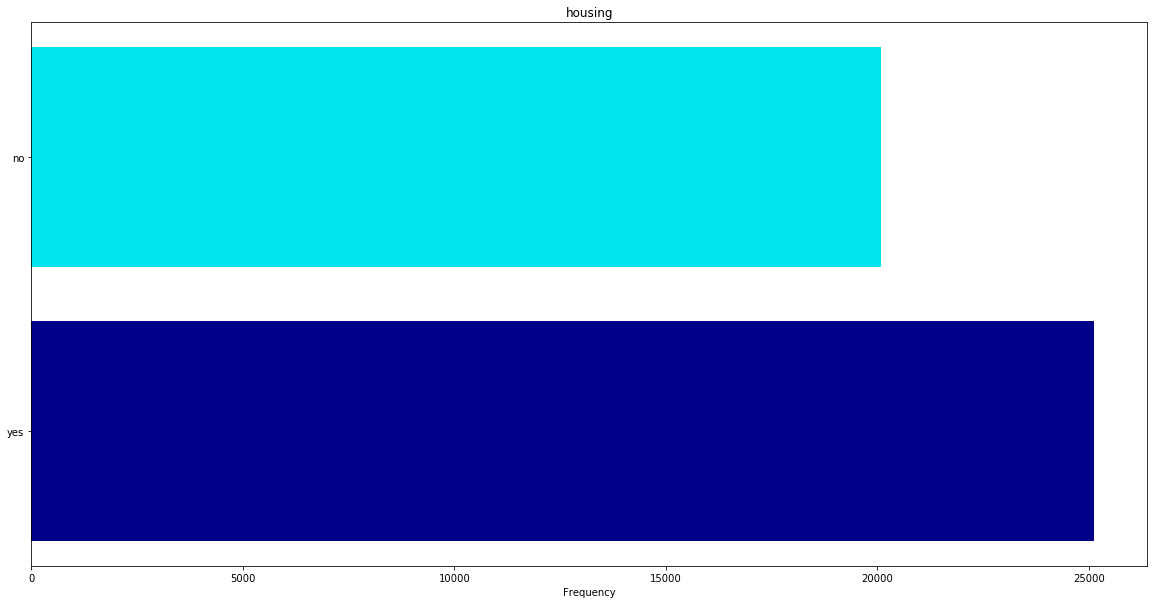

housing: 
 yes    25130
no     20081
Name: housing, dtype: int64


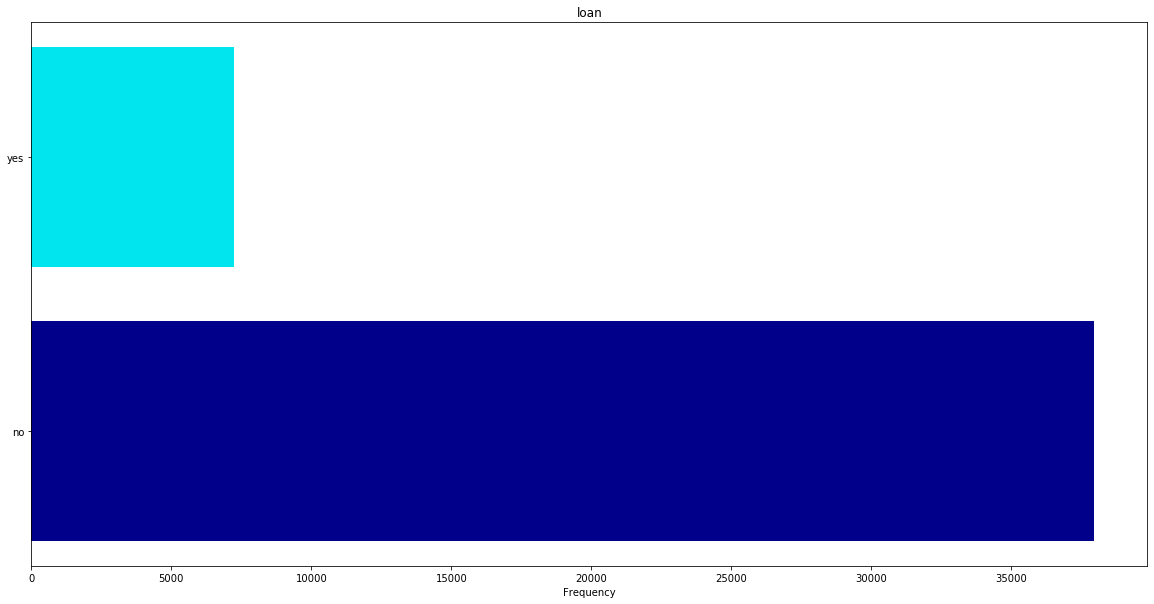

loan: 
 no     37967
yes     7244
Name: loan, dtype: int64


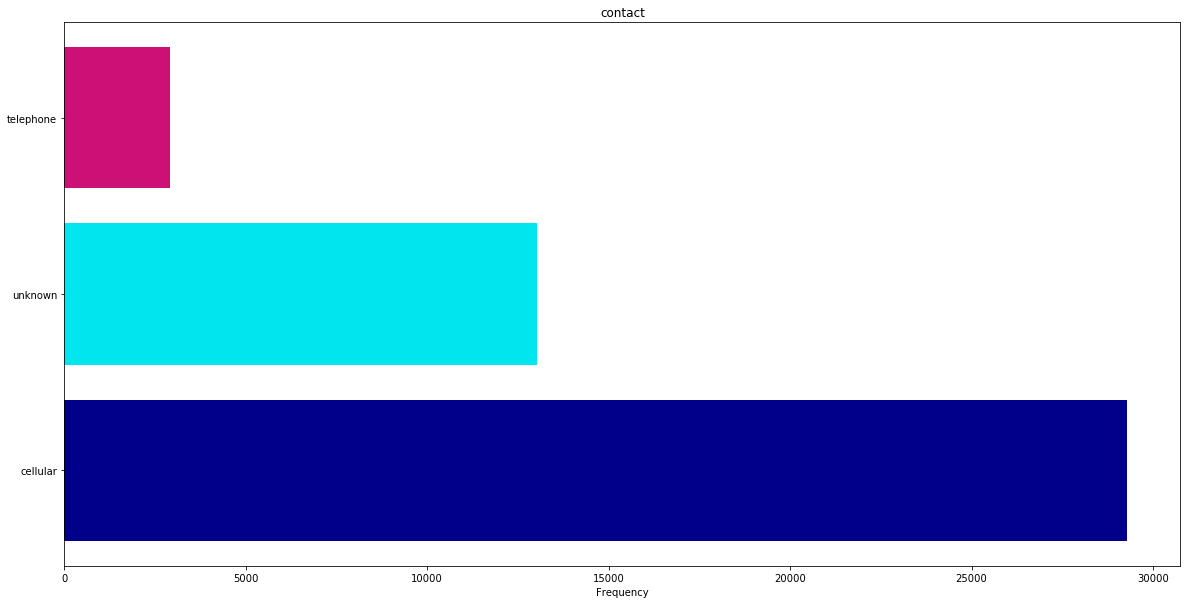

contact: 
 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


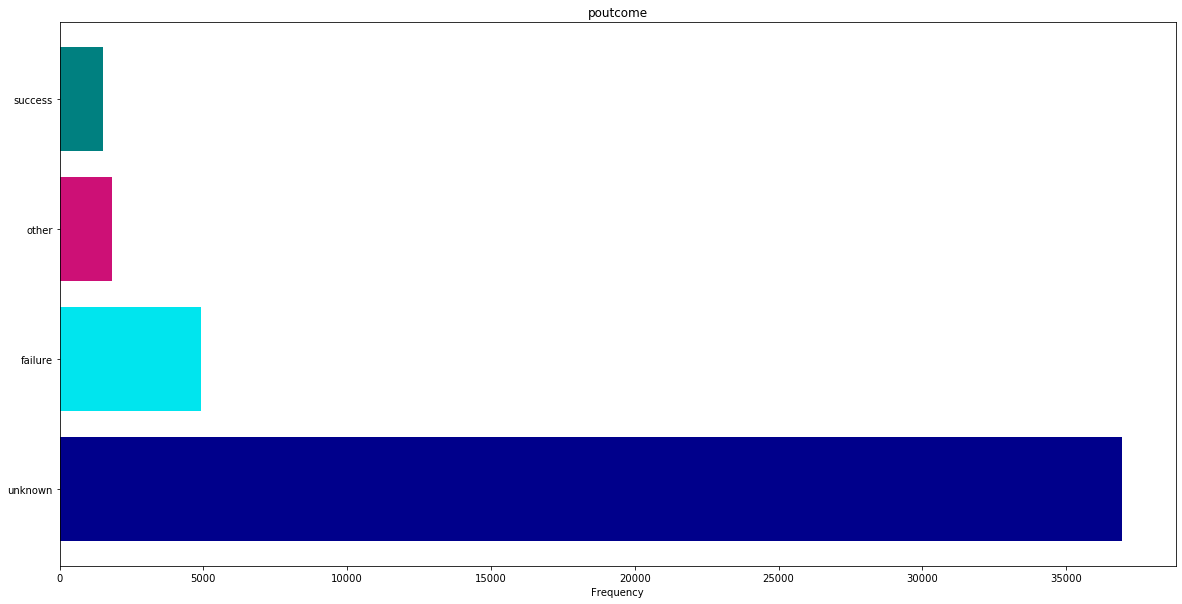

poutcome: 
 unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


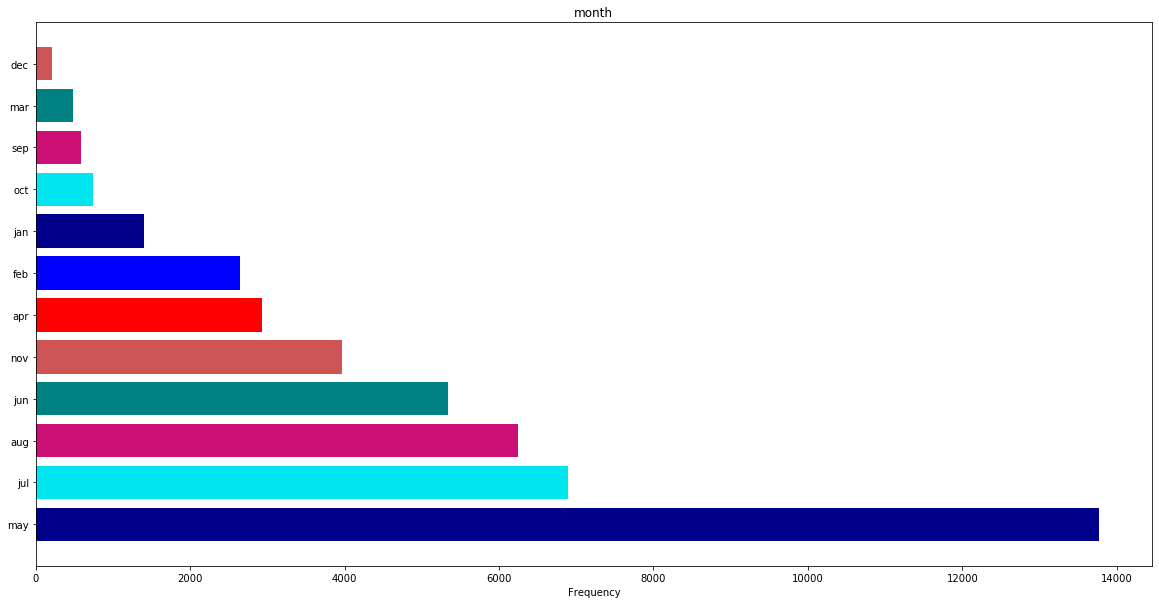

month: 
 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


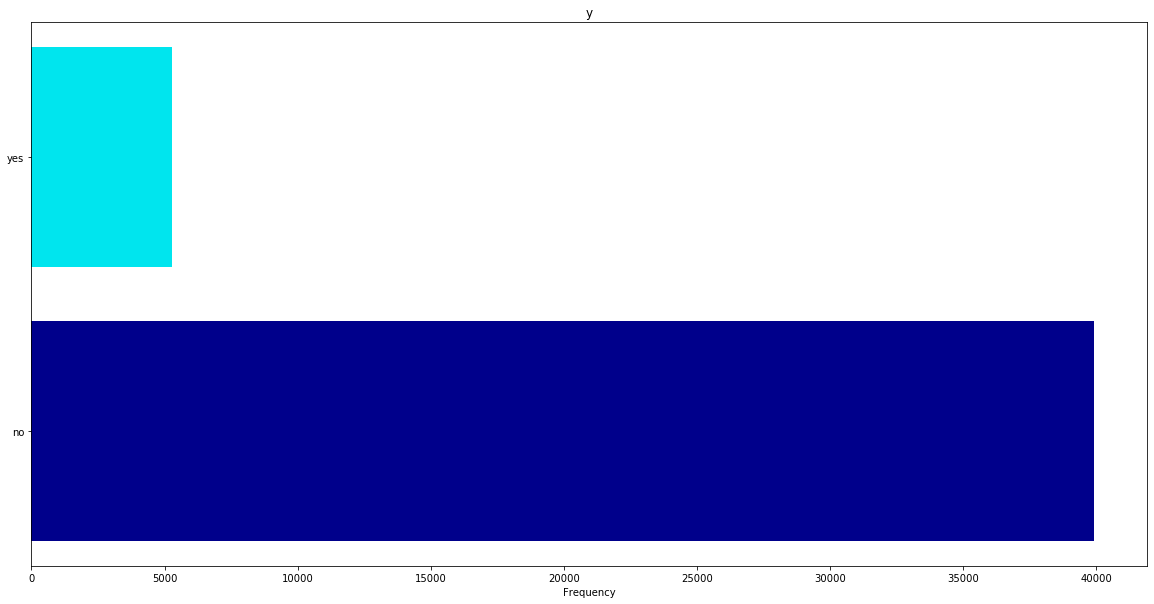

y: 
 no     39922
yes     5289
Name: y, dtype: int64


In [4]:
def bar_plot(variable):
    var =df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(20,10))
    plt.barh(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue',])

    plt.xlabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))
categoryc = ["job","marital","education", "housing", "loan","contact","poutcome","month","y"]
for c in categoryc:
    bar_plot(c)

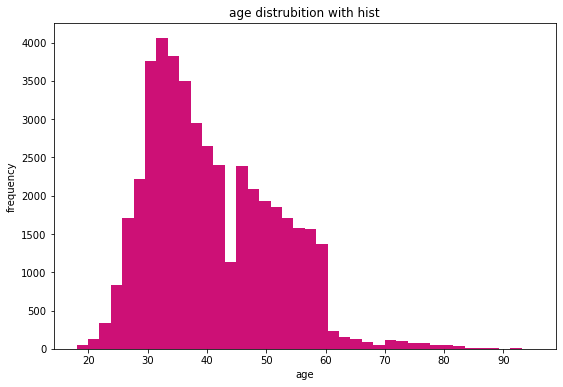

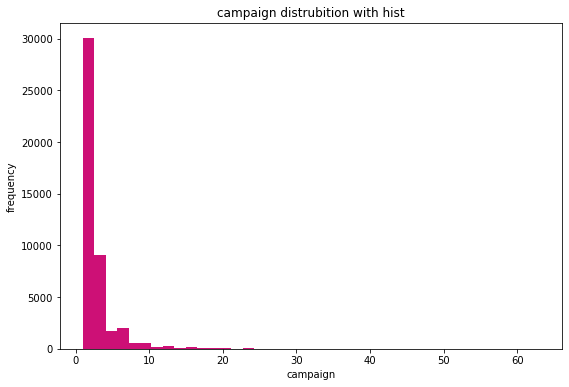

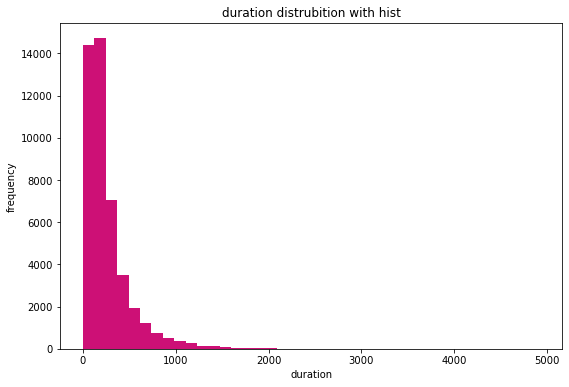

In [12]:
def plot_hist(variable):
    plt.figure(figsize=(9,6))
    plt.hist(df[variable], bins=40,color='#cd1076')
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()
numericVar = ["age","campaign","duration"]
for n in numericVar:
    plot_hist(n)

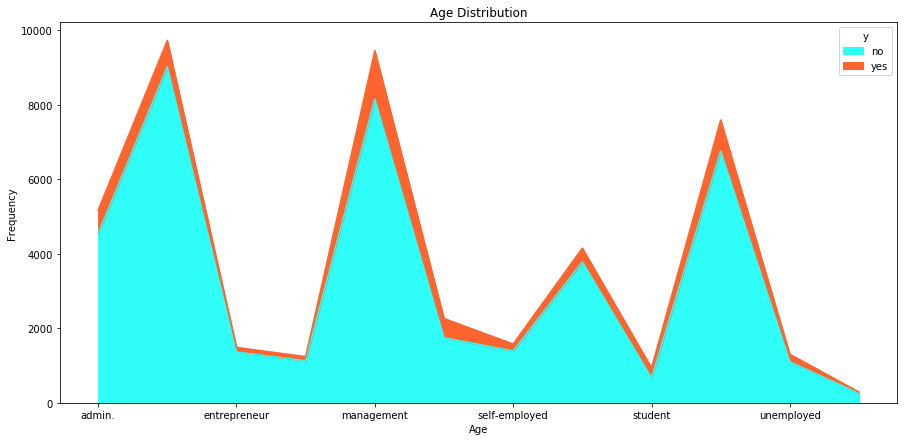

In [26]:
pd.crosstab(df.job,df.y).plot(kind="area",figsize=(15,7),color=['#2EFEF7','#FE642E' ])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

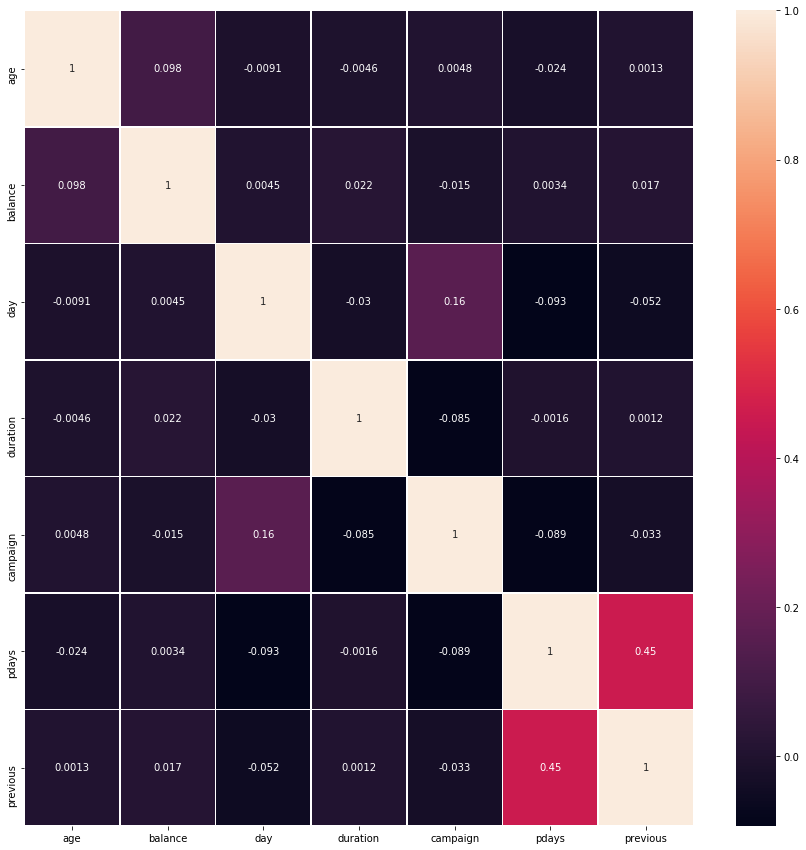

In [22]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


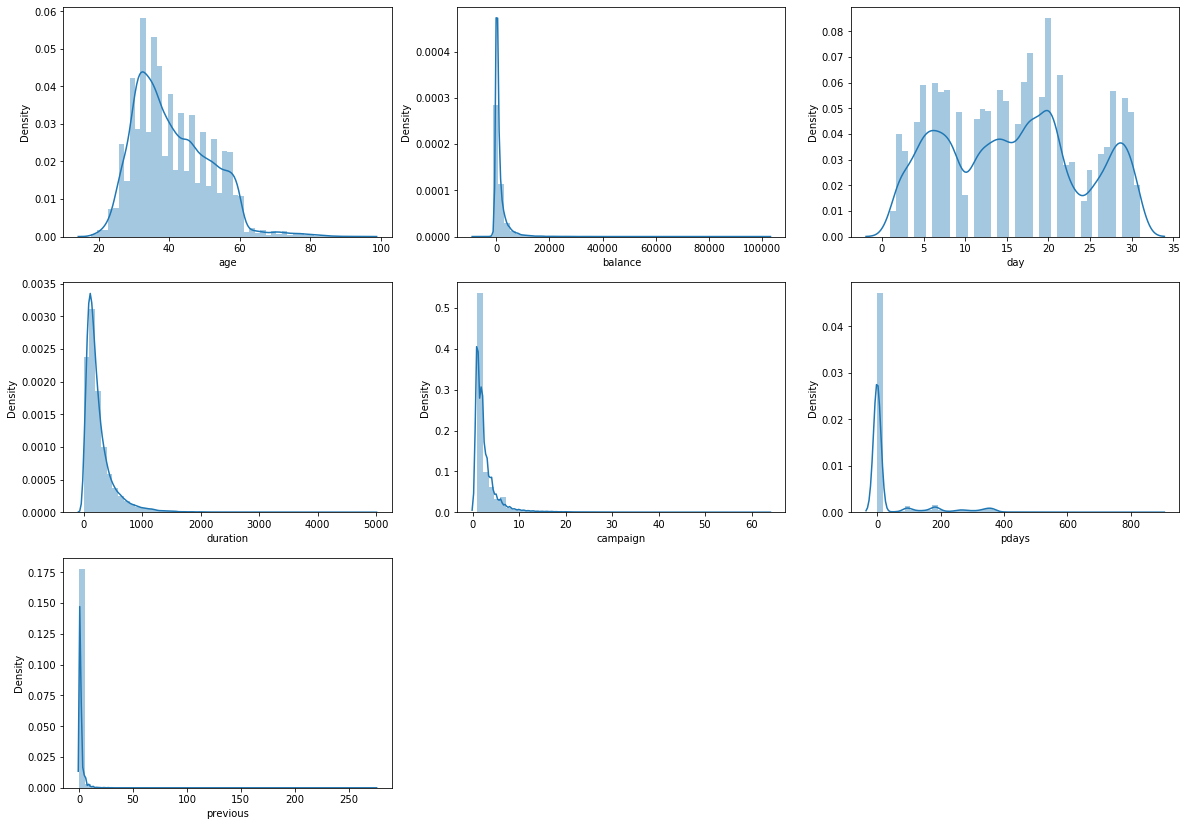

In [22]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print(continuous_features)
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1

plt.show()


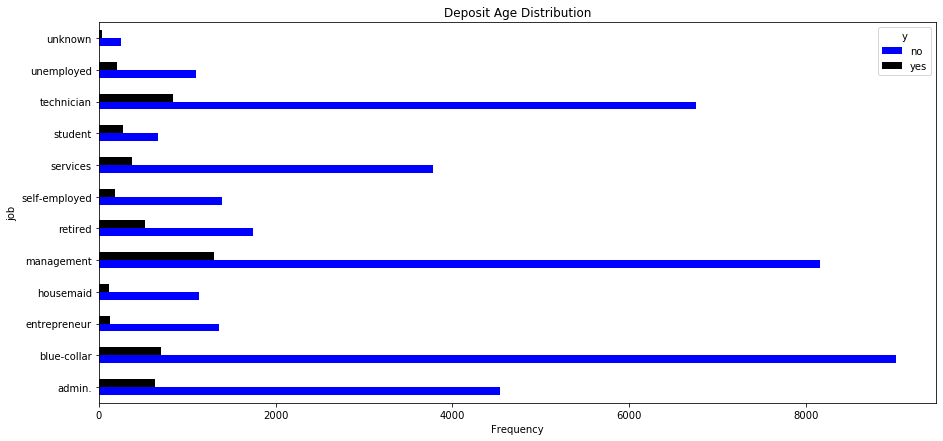

In [37]:
pd.crosstab(df.job,df.y).plot(kind="barh",figsize=(15,7),color=['#0000ff','#000000'])
plt.title('Deposit Age Distribution')
plt.xlabel('Frequency')
plt.ylabel('job')
plt.show()

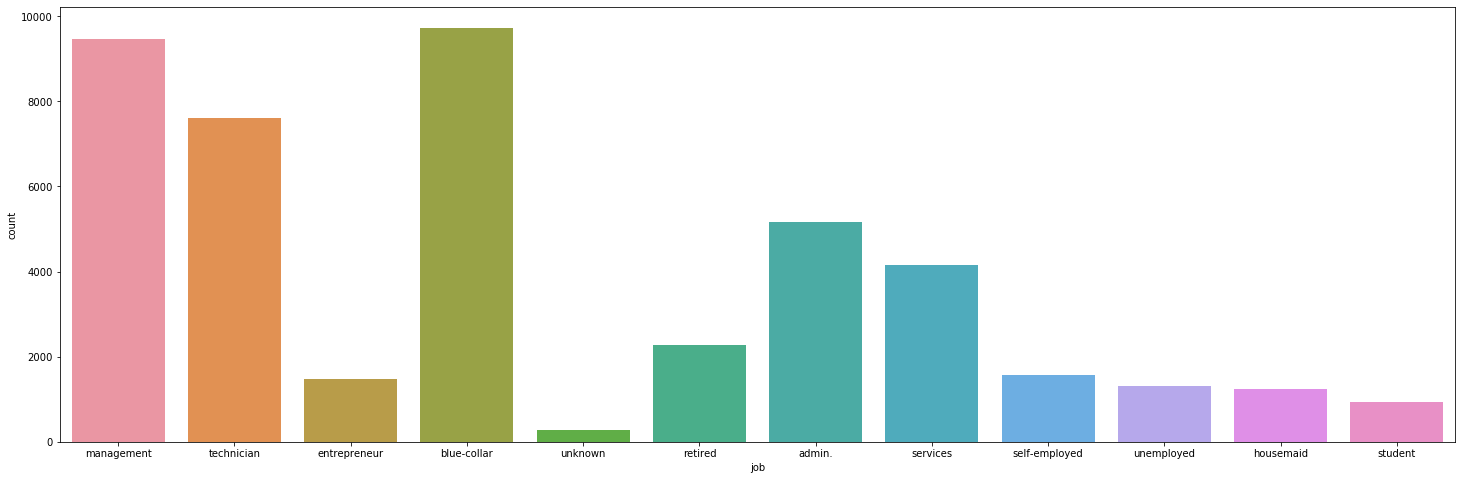

In [38]:
fig=plt.figure(figsize=(25,8))
sns.countplot(x='job',data=df)

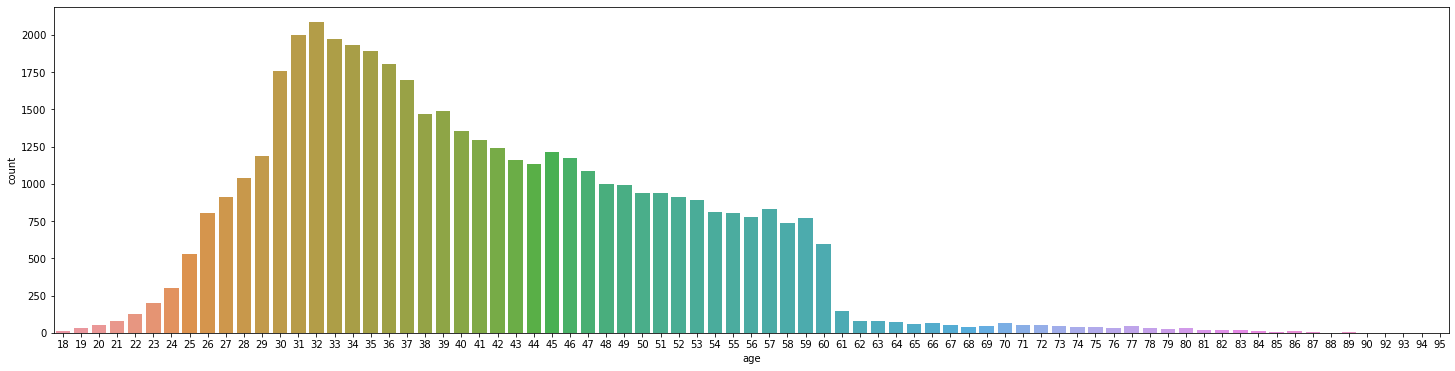

In [15]:
# Let's see how the data is distributed

fig=plt.figure(figsize=(25,6))
sns.countplot(x='age',data=df)

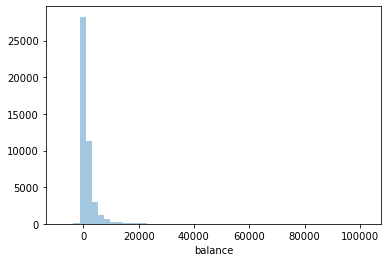

In [40]:
sns.distplot(df.balance,hist=True,kde=False)

Text(0.5, 1.0, 'Marital Staus')

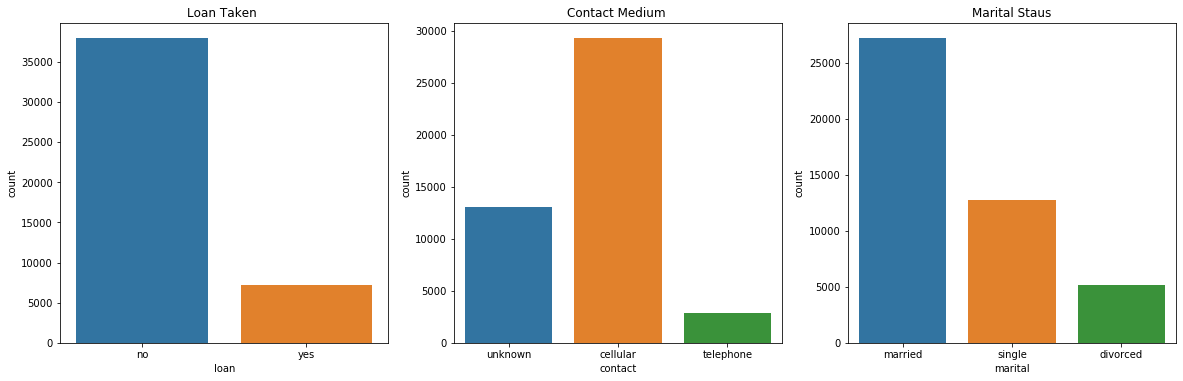

In [41]:
fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(331)
ax2=fig.add_subplot(332)
ax3=fig.add_subplot(333)


sns.countplot(x='loan',data=df,ax=ax1)
ax1.set_title('Loan Taken ')

sns.countplot(x='contact',data=df,ax=ax2)
ax2.set_title('Contact Medium ')

sns.countplot(x='marital',data=df)
ax3.set_title('Marital Staus')

In [ ]:
sns.pairplot(df,hue='y')

In [ ]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

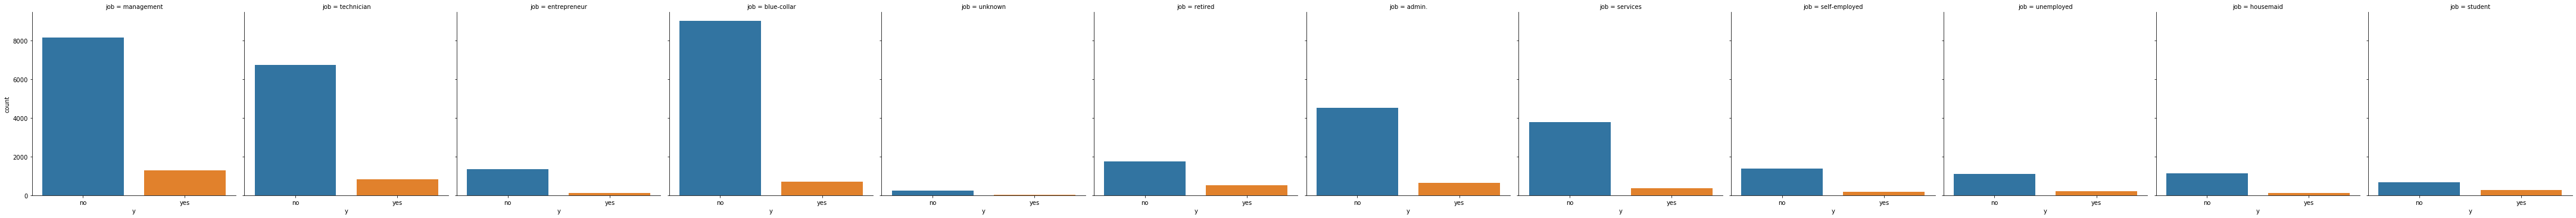

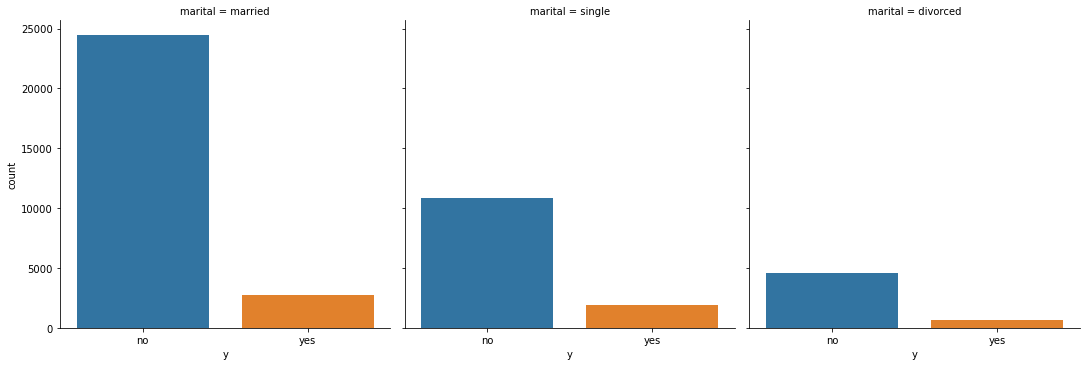

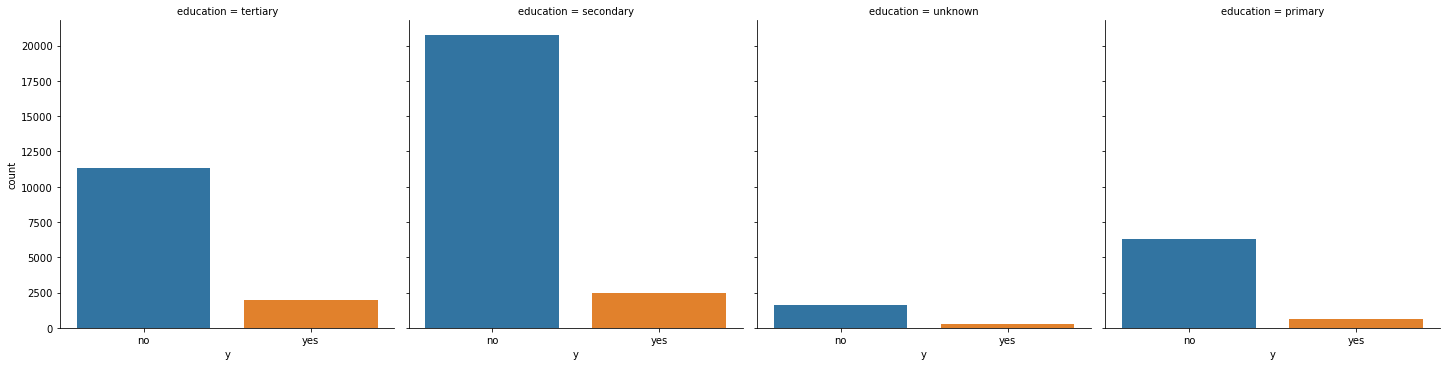

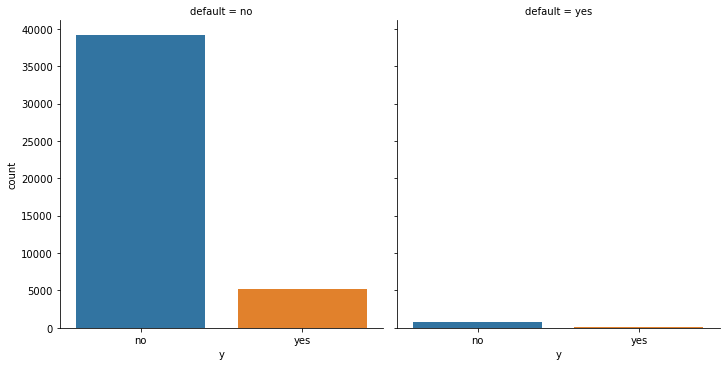

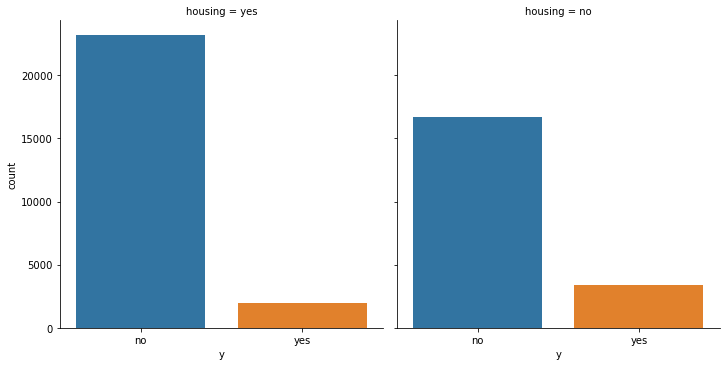

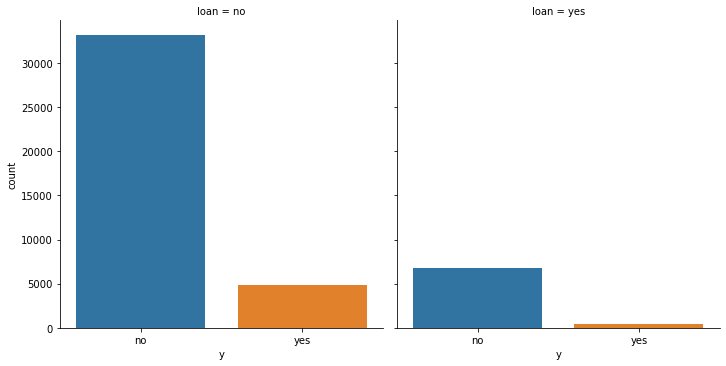

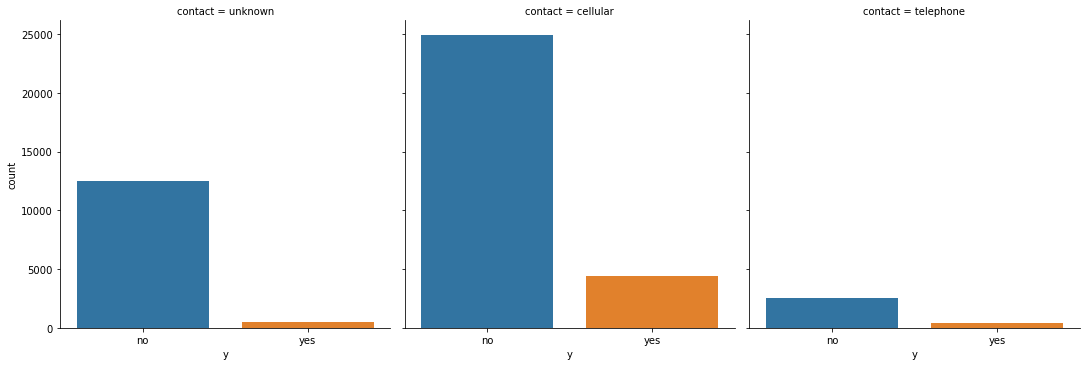

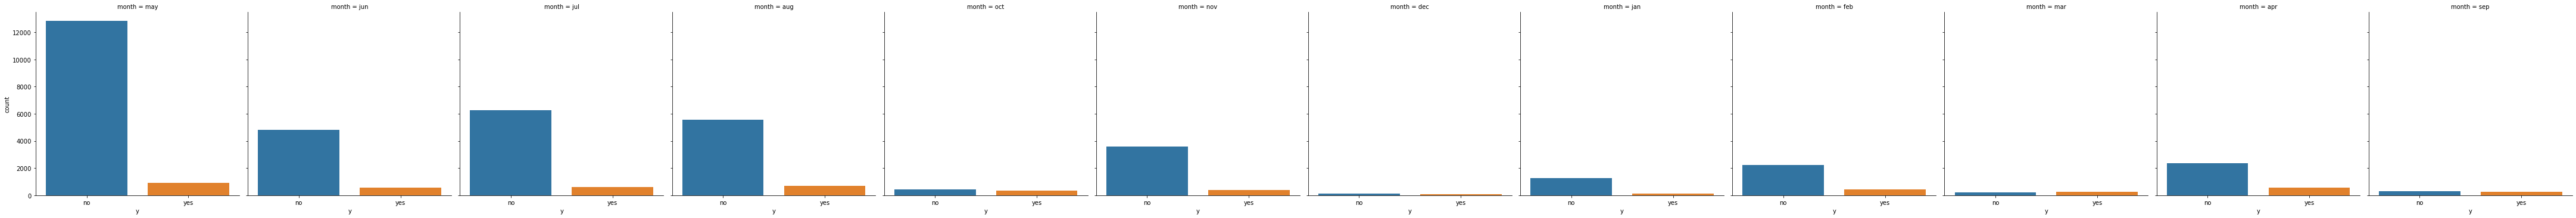

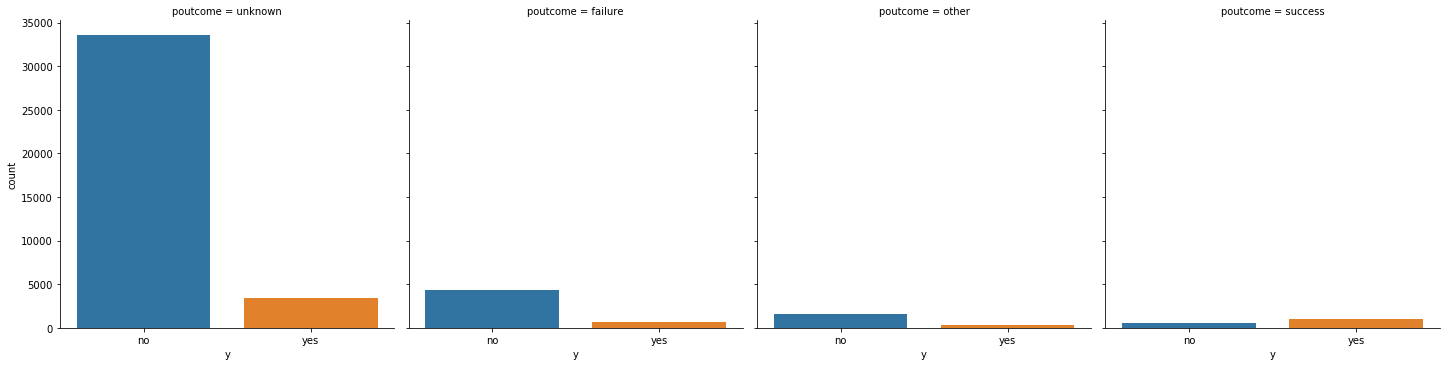

In [5]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()


In [24]:
index = np.arange(5)
width = 0.30
plt.bar(index, a, width, color="blue",label="No")
plt.bar(index, b, width, color="red",label="Yes", bottom=a)
plt.xticks(index,div)
plt.legend()
plt.show()


NameError: name 'a' is not defined

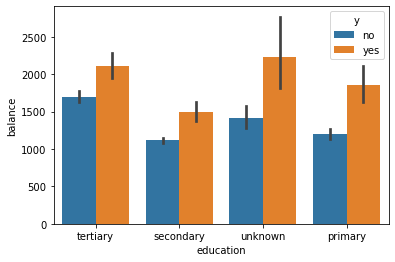

In [25]:
sns.barplot(hue = 'y',x = 'education',y='balance',data=df)

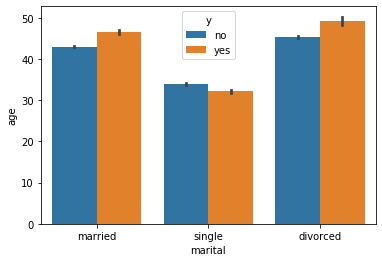

In [28]:
sns.barplot(x='marital',y='age',hue='y',data=df);

In [3]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

NameError: name 'numerical_features' is not defined

<Figure size 1440x4320 with 0 Axes>